## Track Features EDA
 

Looking at a dataset with such magnitude, it is extremely difficult to determine the significance of the features or attributes collected. Thus, it is important to pick an appropriate methodology in order to be able to gain insight about the data. The Exploratory Data Analysis (EDA) phase investigates the data collected and aims to draw insight for this data through observing common patterns between the data and understanding the way in which these patterns connect. The EDA also helps identify outliers in the data and detect anomalies. 

Graphs and other forms of data visualization and statistical techniques will utilized in this noteboo in order to represent the data collected in a clearer manner.  

## Imports

In [1]:
import pandas as pd
import numpy as np
import re
import swifter #used to make pd.apply more efficient
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn

import warnings
warnings.filterwarnings('ignore')

In [78]:
tracks_df = pd.read_csv('/Users/mariamtamer/VSCodeProjects/lyricalanalysis/data/all_tracks_cleaned.csv')

In [26]:
tracks_df.head()

,track_uri,track_name,cleaned_track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_genres,track_duration_ms,track_time_signature,...,track_valence,track_lyrics,lyrics_page_views,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label,album_cover
0,spotify:track:2HSmyk2qMN8WQjuGhaQgCk,Champagne Poetry,Champagne Poetry,"('Drake',)",NaN,True,82,"('hip hop', 'pop', 'rap')",336511,4.0,...,0.496,"Champagne Poetry Lyrics\n\nI love you, I love ...",688853.0,1,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
1,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX,Papi’s Home,Papi’s Home,"('Drake',)",NaN,True,76,"('hip hop', 'pop', 'rap')",178623,4.0,...,0.588,Papi’s Home Lyrics\nI know that I hurt you\nYe...,445883.0,2,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
2,spotify:track:37Nqx7iavZpotJSDXZWbJ3,Girls Want Girls (with Lil Baby),NaN,"('Drake', 'Lil Baby')",NaN,True,86,"('hip hop', 'pop', 'rap', 'trap')",221979,4.0,...,0.381,NaN,NaN,3,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
3,spotify:track:61S79KIVA4I9FXbnsylEHT,In The Bible (with Lil Durk & Giveon),In The Bible,"('Drake', 'Lil Durk', 'Giveon')","('GIVĒON', 'Lil Durk')",True,79,"('hip hop', 'pop', 'rap', 'drill', 'trap', 'r&b')",296568,4.0,...,0.147,"In The Bible Lyrics\nOkay, okay, okay\nCountin...",439186.0,4,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
4,spotify:track:4VCbgIdr8ptegWeJpqLVHH,Love All (with JAY-Z),NaN,"('Drake', 'JAY-Z')",NaN,True,77,"('hip hop', 'pop', 'rap')",228461,4.0,...,0.155,NaN,NaN,5,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...


## Determining the Top Artists

The first graph created is a count plot representing the top 15 artists with the greatest track releases on Spotify. From this we can see that Louis Armstrong had the most tracks, and there is a huge drop off after the top 4 artists. These artists have a total of 29,688 songs out of 156,480 total songs, which is about 19% of all the data meaning that these artists will influence other factors of the analysis greatly.

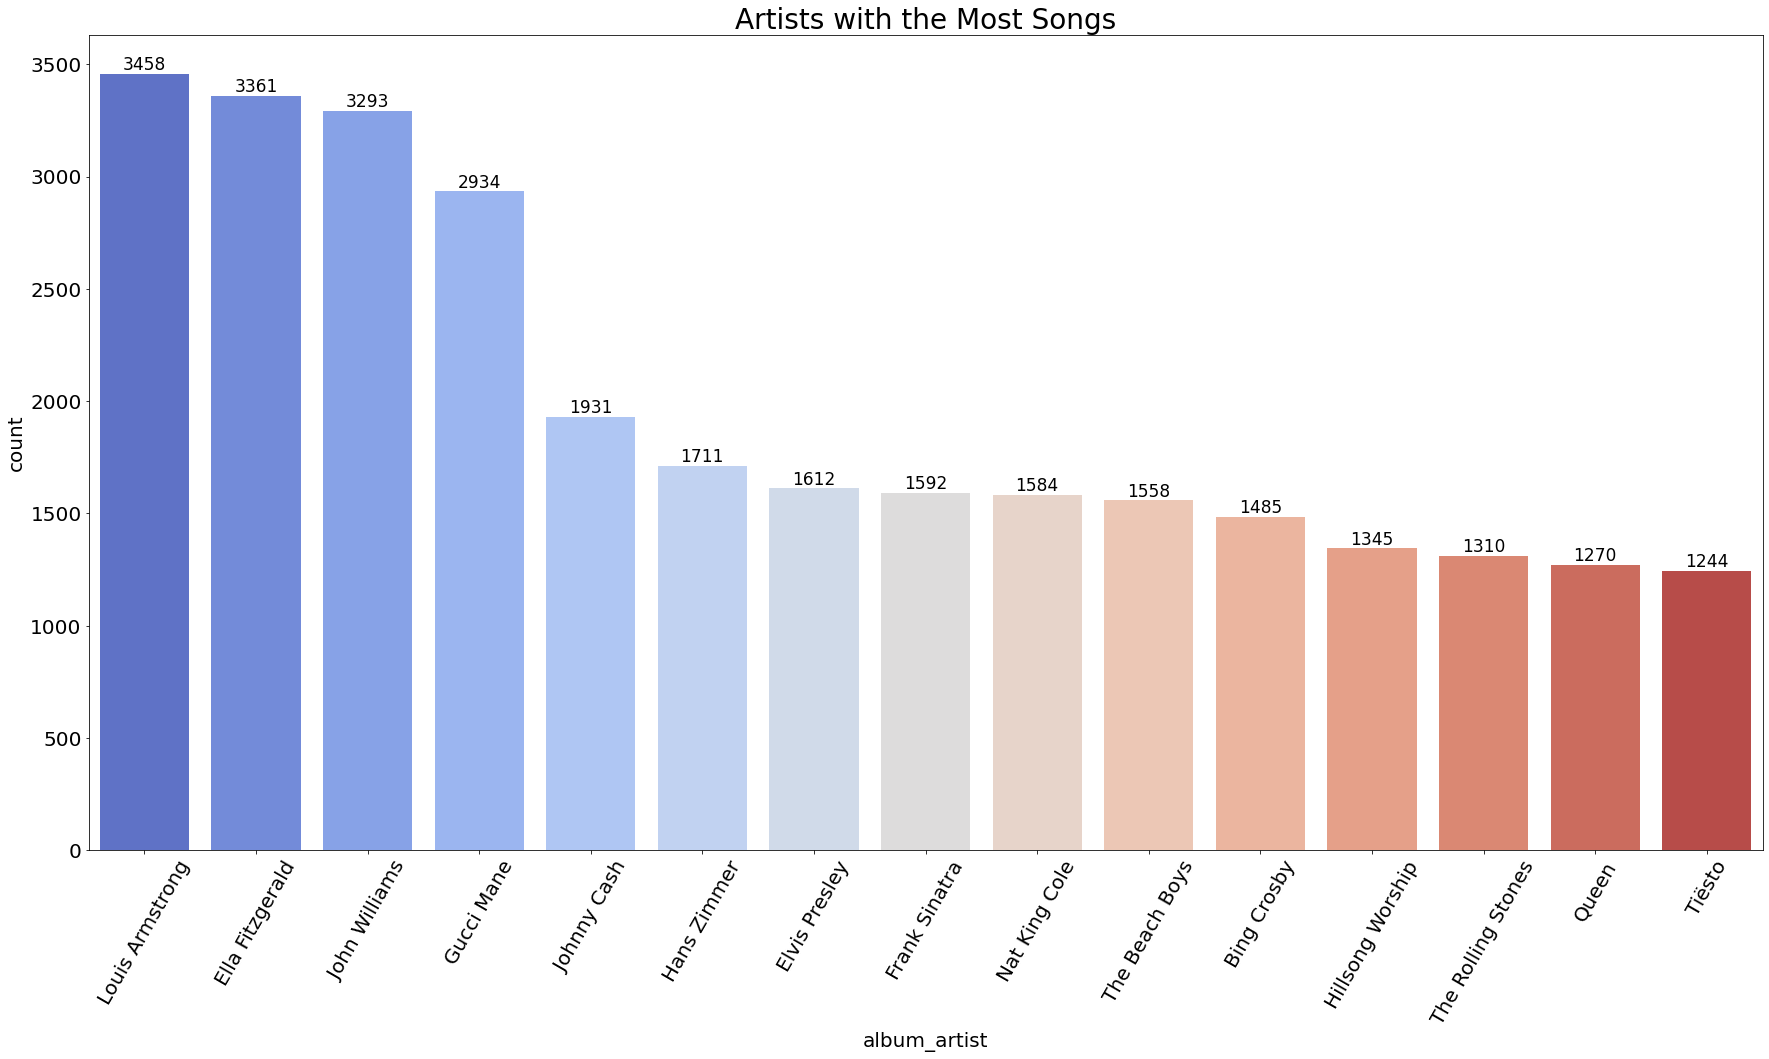

In [27]:
plt.figure(figsize=(30,15))
plt.title('Artists with the Most Songs',fontsize=28)
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.album_artist,order=pd.value_counts(tracks_df.album_artist).iloc[:15].index,palette=seaborn.color_palette("coolwarm", 15))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

Representing this data as a pie chart may make the data easier to understand as percentages help visualize and understand the difference in the occurences.

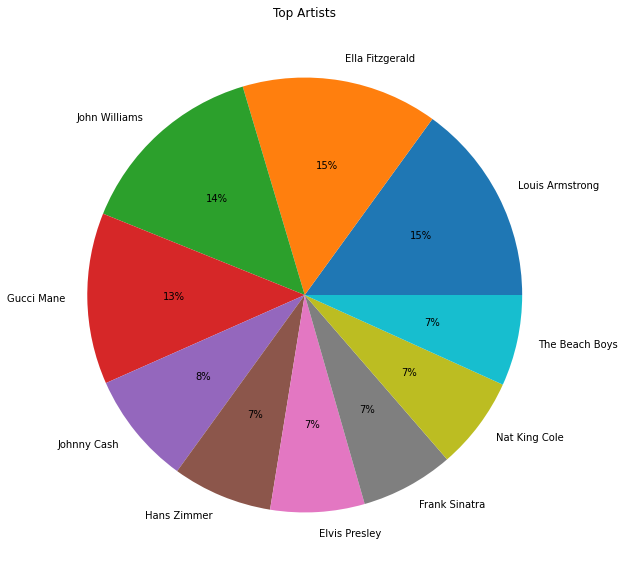

In [34]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['album_artist'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Artists", ylabel = "")
fig.set_facecolor('white')


## Genre Analysis

The first genre of each track_genres list can be taken and a graph can be drawn to show the counts of each genre accordingly.

In [28]:
tracks_df["top_genre"] = tracks_df.track_genres.str.split(',').str.get(0)

In [29]:
tracks_df["top_genre"] = tracks_df["top_genre"].str.replace('(', '').str.replace("'","").str.replace(')', '')

From this data, it shows that 21% of all songs are rock songs, followed by hip hop. This is only taking into consideration the first genre only. However, let;s modify the approch to include all the genres in the list. 

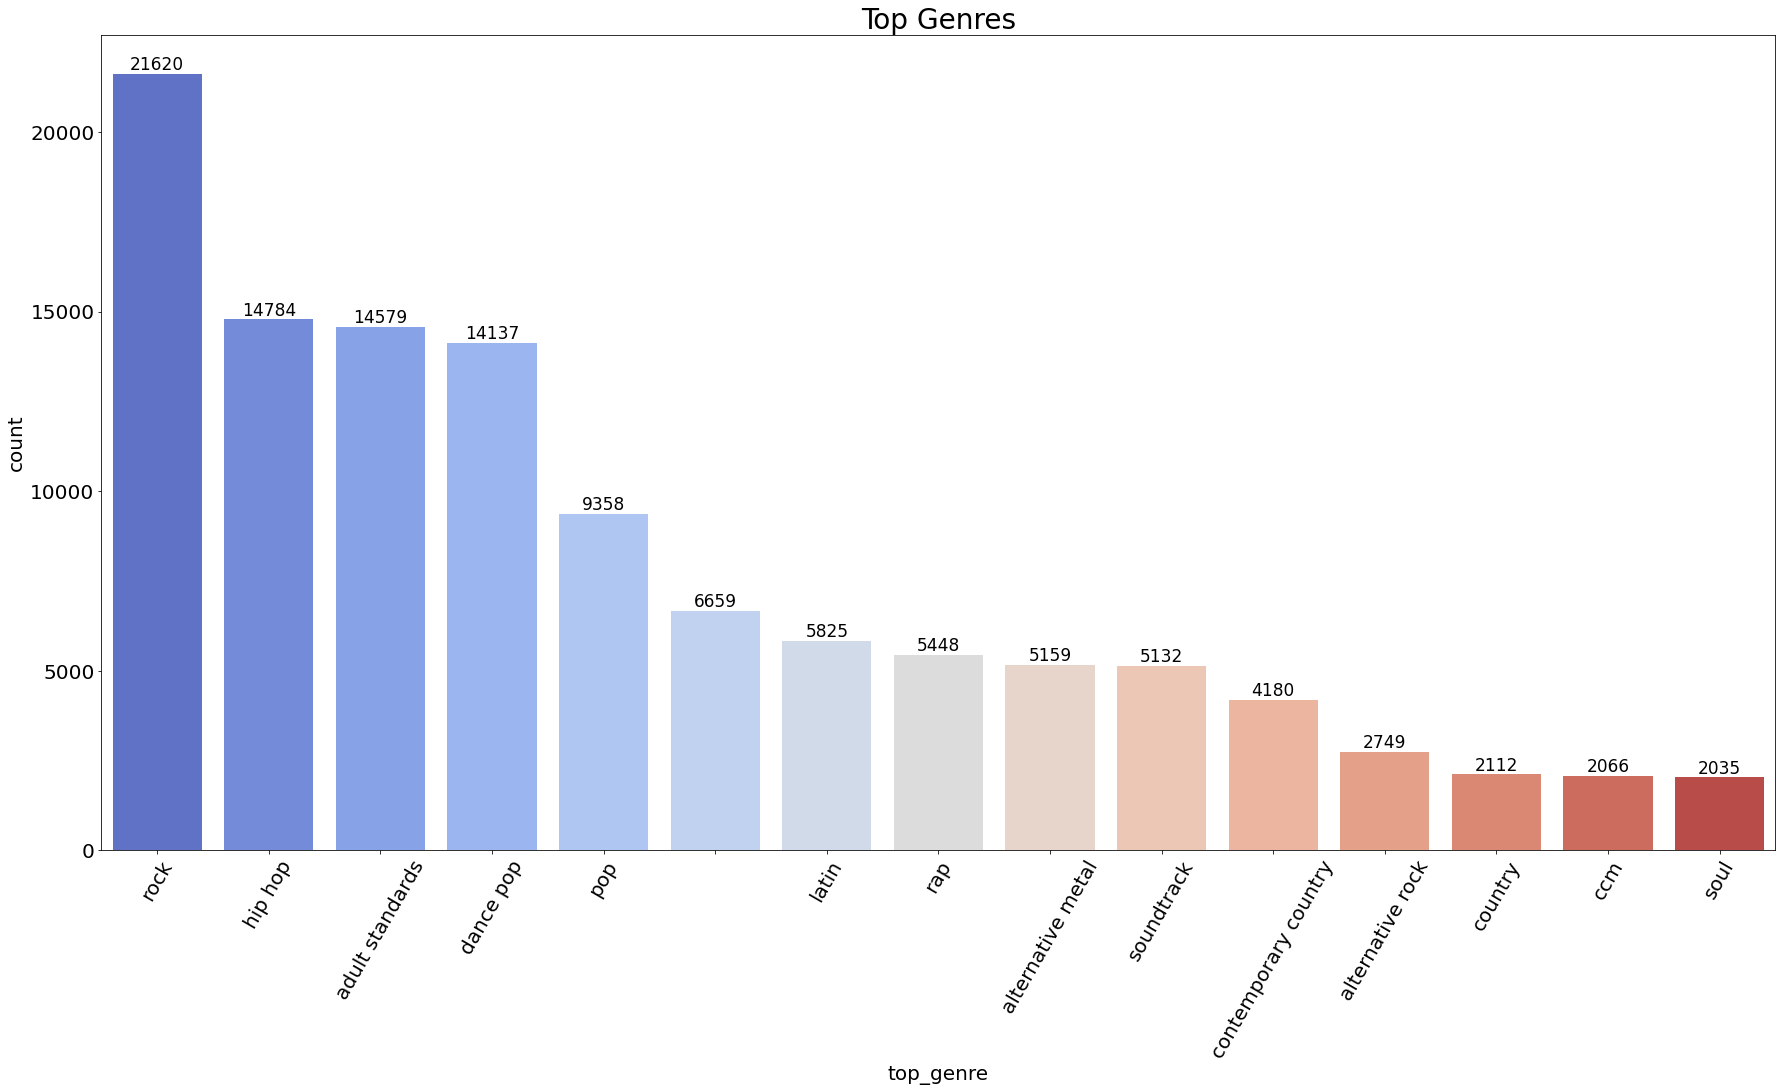

In [32]:
plt.figure(figsize=(30,15))
plt.title('Top Genres',fontsize=28)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.top_genre,order=pd.value_counts(tracks_df.top_genre).iloc[:15].index,palette=seaborn.color_palette("coolwarm", 15))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

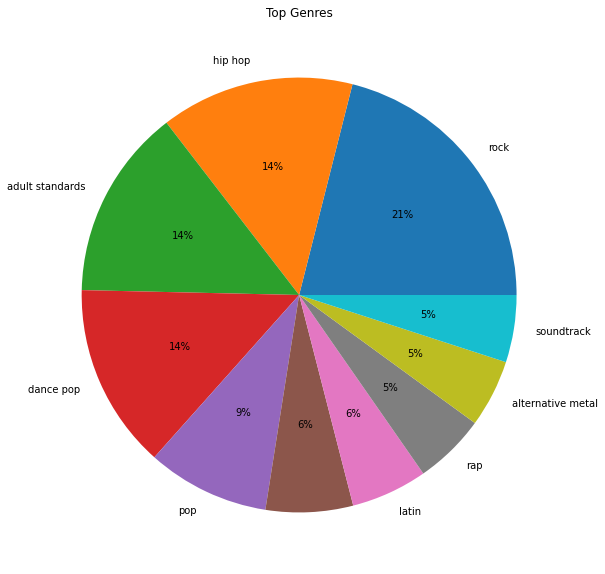

In [35]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['top_genre'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Genres", ylabel = "")
fig.set_facecolor('white')

### Splitting the Genres

each list of genres is split into columns in order to get the count of each genre. However it was quicly realized that this approach is very ineffective since not all songs contained the same amount of genres.

In [ ]:
from ast import literal_eval
tracks_df['track_genres'] = tracks_df['track_genres'].apply(literal_eval)

In [ ]:
def split_genres_preprocess(genres_list):
    genres_list = list(genres_list)
    i = len(genres_list) - 1
    while len(genres_list) > 5:
        genres_list.pop(i)
        i -= 1
    return genres_list

In [ ]:
tracks_df['track_genres'] = tracks_df.apply(lambda x: split_genres_preprocess(x.track_genres), axis=1)
tracks_df[['track_genres']]

,track_genres
0,"[hip hop, pop, rap]"
1,"[hip hop, pop, rap]"
2,"[hip hop, pop, rap, trap]"
3,"[hip hop, pop, rap, drill, trap]"
4,"[hip hop, pop, rap]"
...,...
156475,"[boy band, dance pop, europop]"
156476,"[boy band, dance pop, europop]"
156477,"[boy band, dance pop, europop]"
156478,"[boy band, dance pop, europop]"


In [ ]:
split_genres = tracks_df.copy()
split_genres[['track_genre_1', 'track_genre_2', 'track_genre_3', 'track_genre_4', 'track_genre_5']] = pd.DataFrame(split_genres['track_genres'].tolist(), index=split_genres.index).fillna(np.nan)
split_genres[['track_genre_1', 'track_genre_2', 'track_genre_3', 'track_genre_4', 'track_genre_5']] 


,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5
0,hip hop,pop,rap,NaN,NaN
1,hip hop,pop,rap,NaN,NaN
2,hip hop,pop,rap,trap,NaN
3,hip hop,pop,rap,drill,trap
4,hip hop,pop,rap,NaN,NaN
...,...,...,...,...,...
156475,boy band,dance pop,europop,NaN,NaN
156476,boy band,dance pop,europop,NaN,NaN
156477,boy band,dance pop,europop,NaN,NaN
156478,boy band,dance pop,europop,NaN,NaN


There is a lot of data getting lost by having to divide the dataframe this way so after recognizing that a better suited approach for the analysis was to find a way to get the count of the data instead. This was done using the counter from the collections library.

In [ ]:
from collections import Counter

def make_genre_dictionary(df_column):
    freq_list = []
    for genre in df_column:
        freq_list.extend(genre)
    freq_counts = Counter(freq_list)
    return freq_counts
freq_counts_dict = dict(sorted(make_genre_dictionary(tracks_df.track_genres).items(), key=lambda x: x[1], reverse=True))

In [ ]:
genres_df = pd.DataFrame(index=list(freq_counts_dict.keys()), data={
        "Count": list(freq_counts_dict.values()),
    })

In [ ]:
genres_df

,Genres,Count
0,pop,40829
1,rock,39887
2,hip hop,24880
3,rap,23823
4,dance pop,21732
...,...,...
223,mandopop,1
224,zhongguo feng,1
225,opera,1
226,post-minimalism,1


Finally, a more inclusive graph can be shown with the actual total songs for each genre. It can be seen that pop and rock make up 80,716, which is just over 51% percent of the total songs collected. These genres are widely popular in the musical industry so it makes sense why they take up almost half the dataframe.

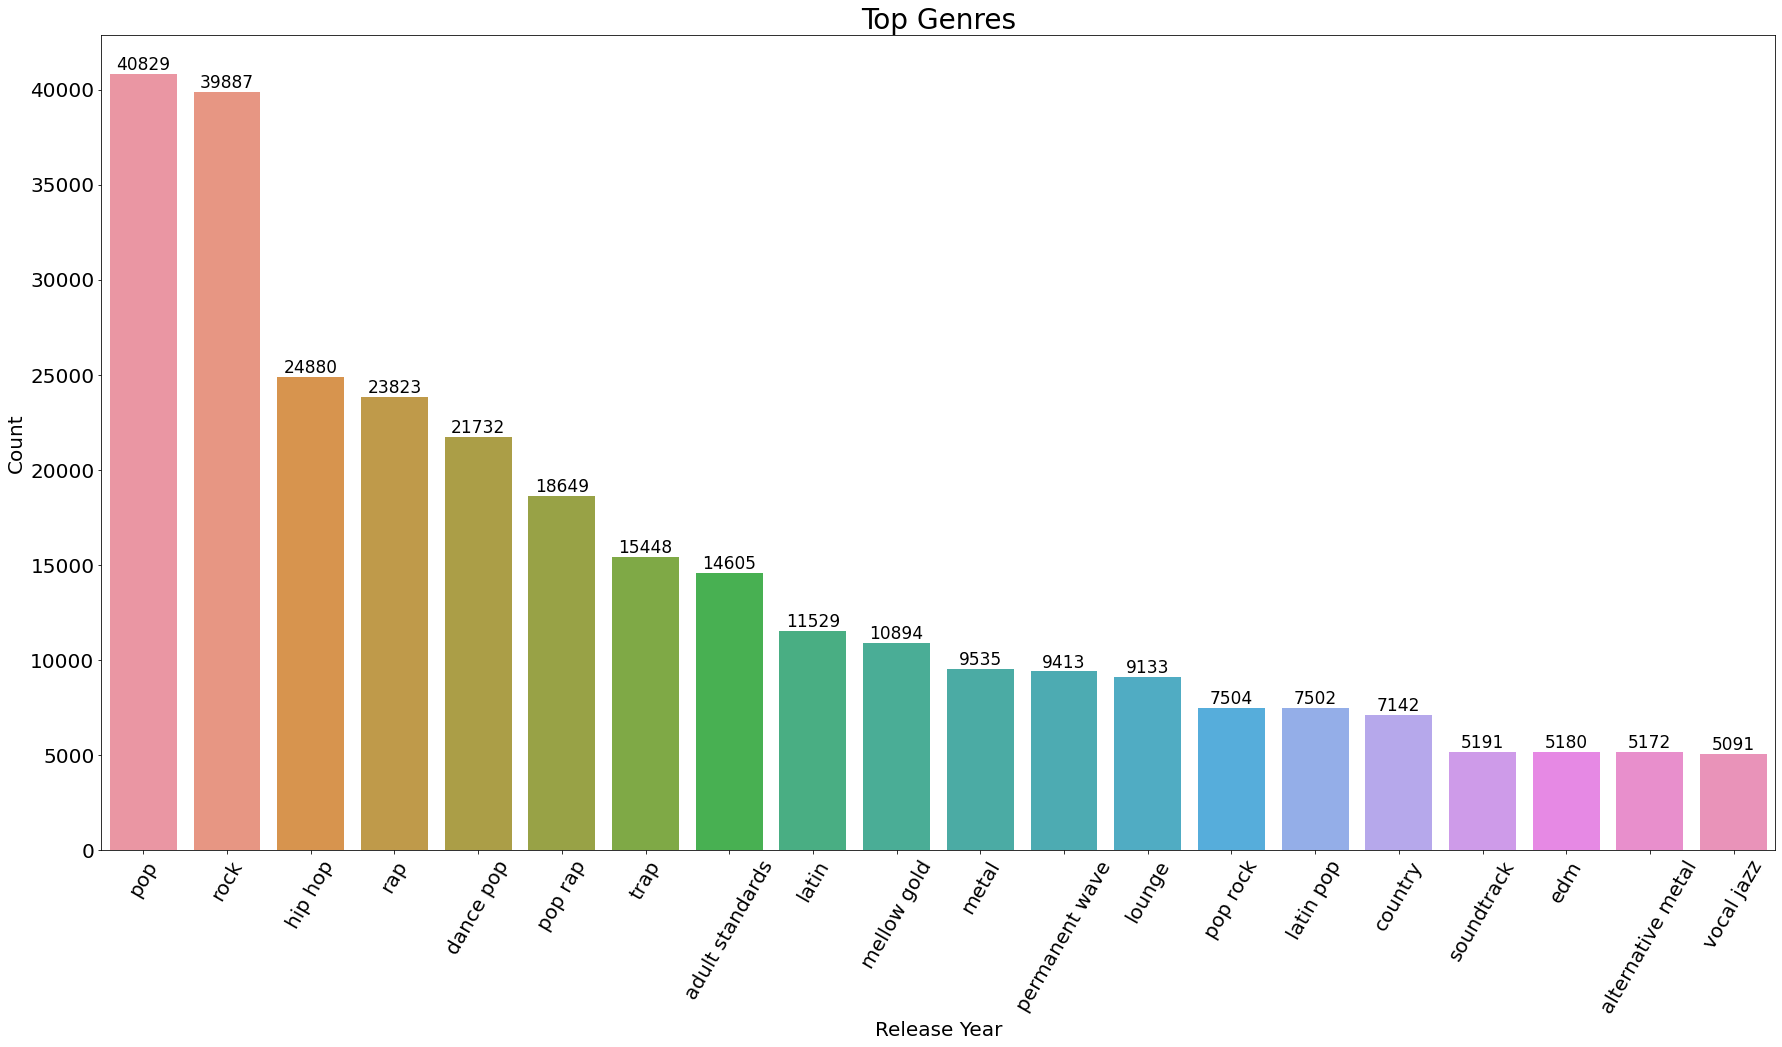

In [190]:
plt.figure(figsize=(30,15))
plt.title('Top Genres',fontsize=28)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.barplot(x=genres_df.head(20).index, y="Count", data=genres_df.head(20))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

### Record Labels

Now, moving onto the top 10 record labels. Record labels are important when artists are first publishing a song, as it can affect the popularity of a song related to the marketing. Record labels also hold rights to the song. From the pie chart, it shows that 20% of the data are published by Columbia records.

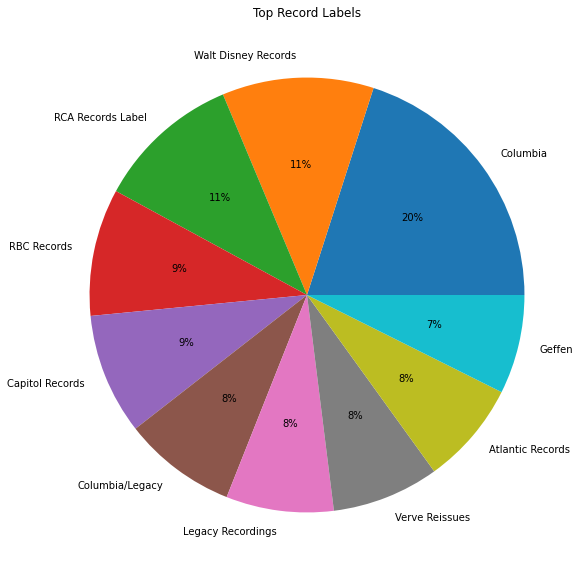

In [36]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['album_record_label'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Record Labels", ylabel = "")
fig.set_facecolor('white')

### Key Signatures

Seeing which key signature is most frequently used can help understand what key signature people prefer when listening to music as it can affect the perception of the song. From the pie chart, it shows that the most popular key signature is C Major. It can also be seen that over 62% of songs are made of major keys. Major keys are often seen as more positive and happier than minor keys. This observation is in line with the fact that there were more positive songs in the sentiment analysis but from the musical aspect of things which could be indicative that the track data collected gives a more positive mood.

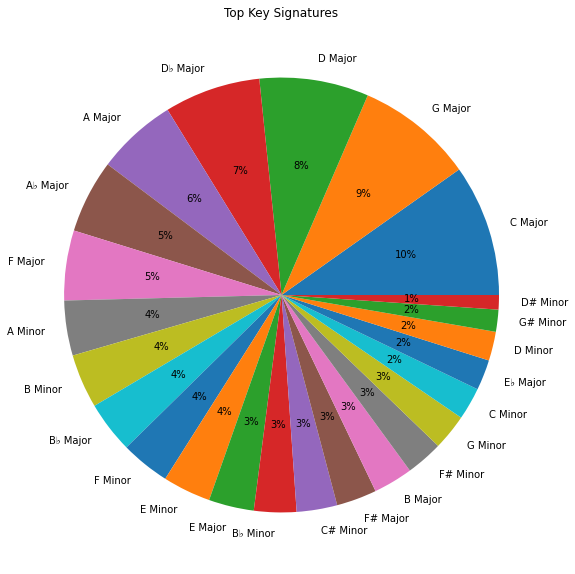

In [37]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['track_key_signature'].value_counts().plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Key Signatures", ylabel = "")
fig.set_facecolor('white')

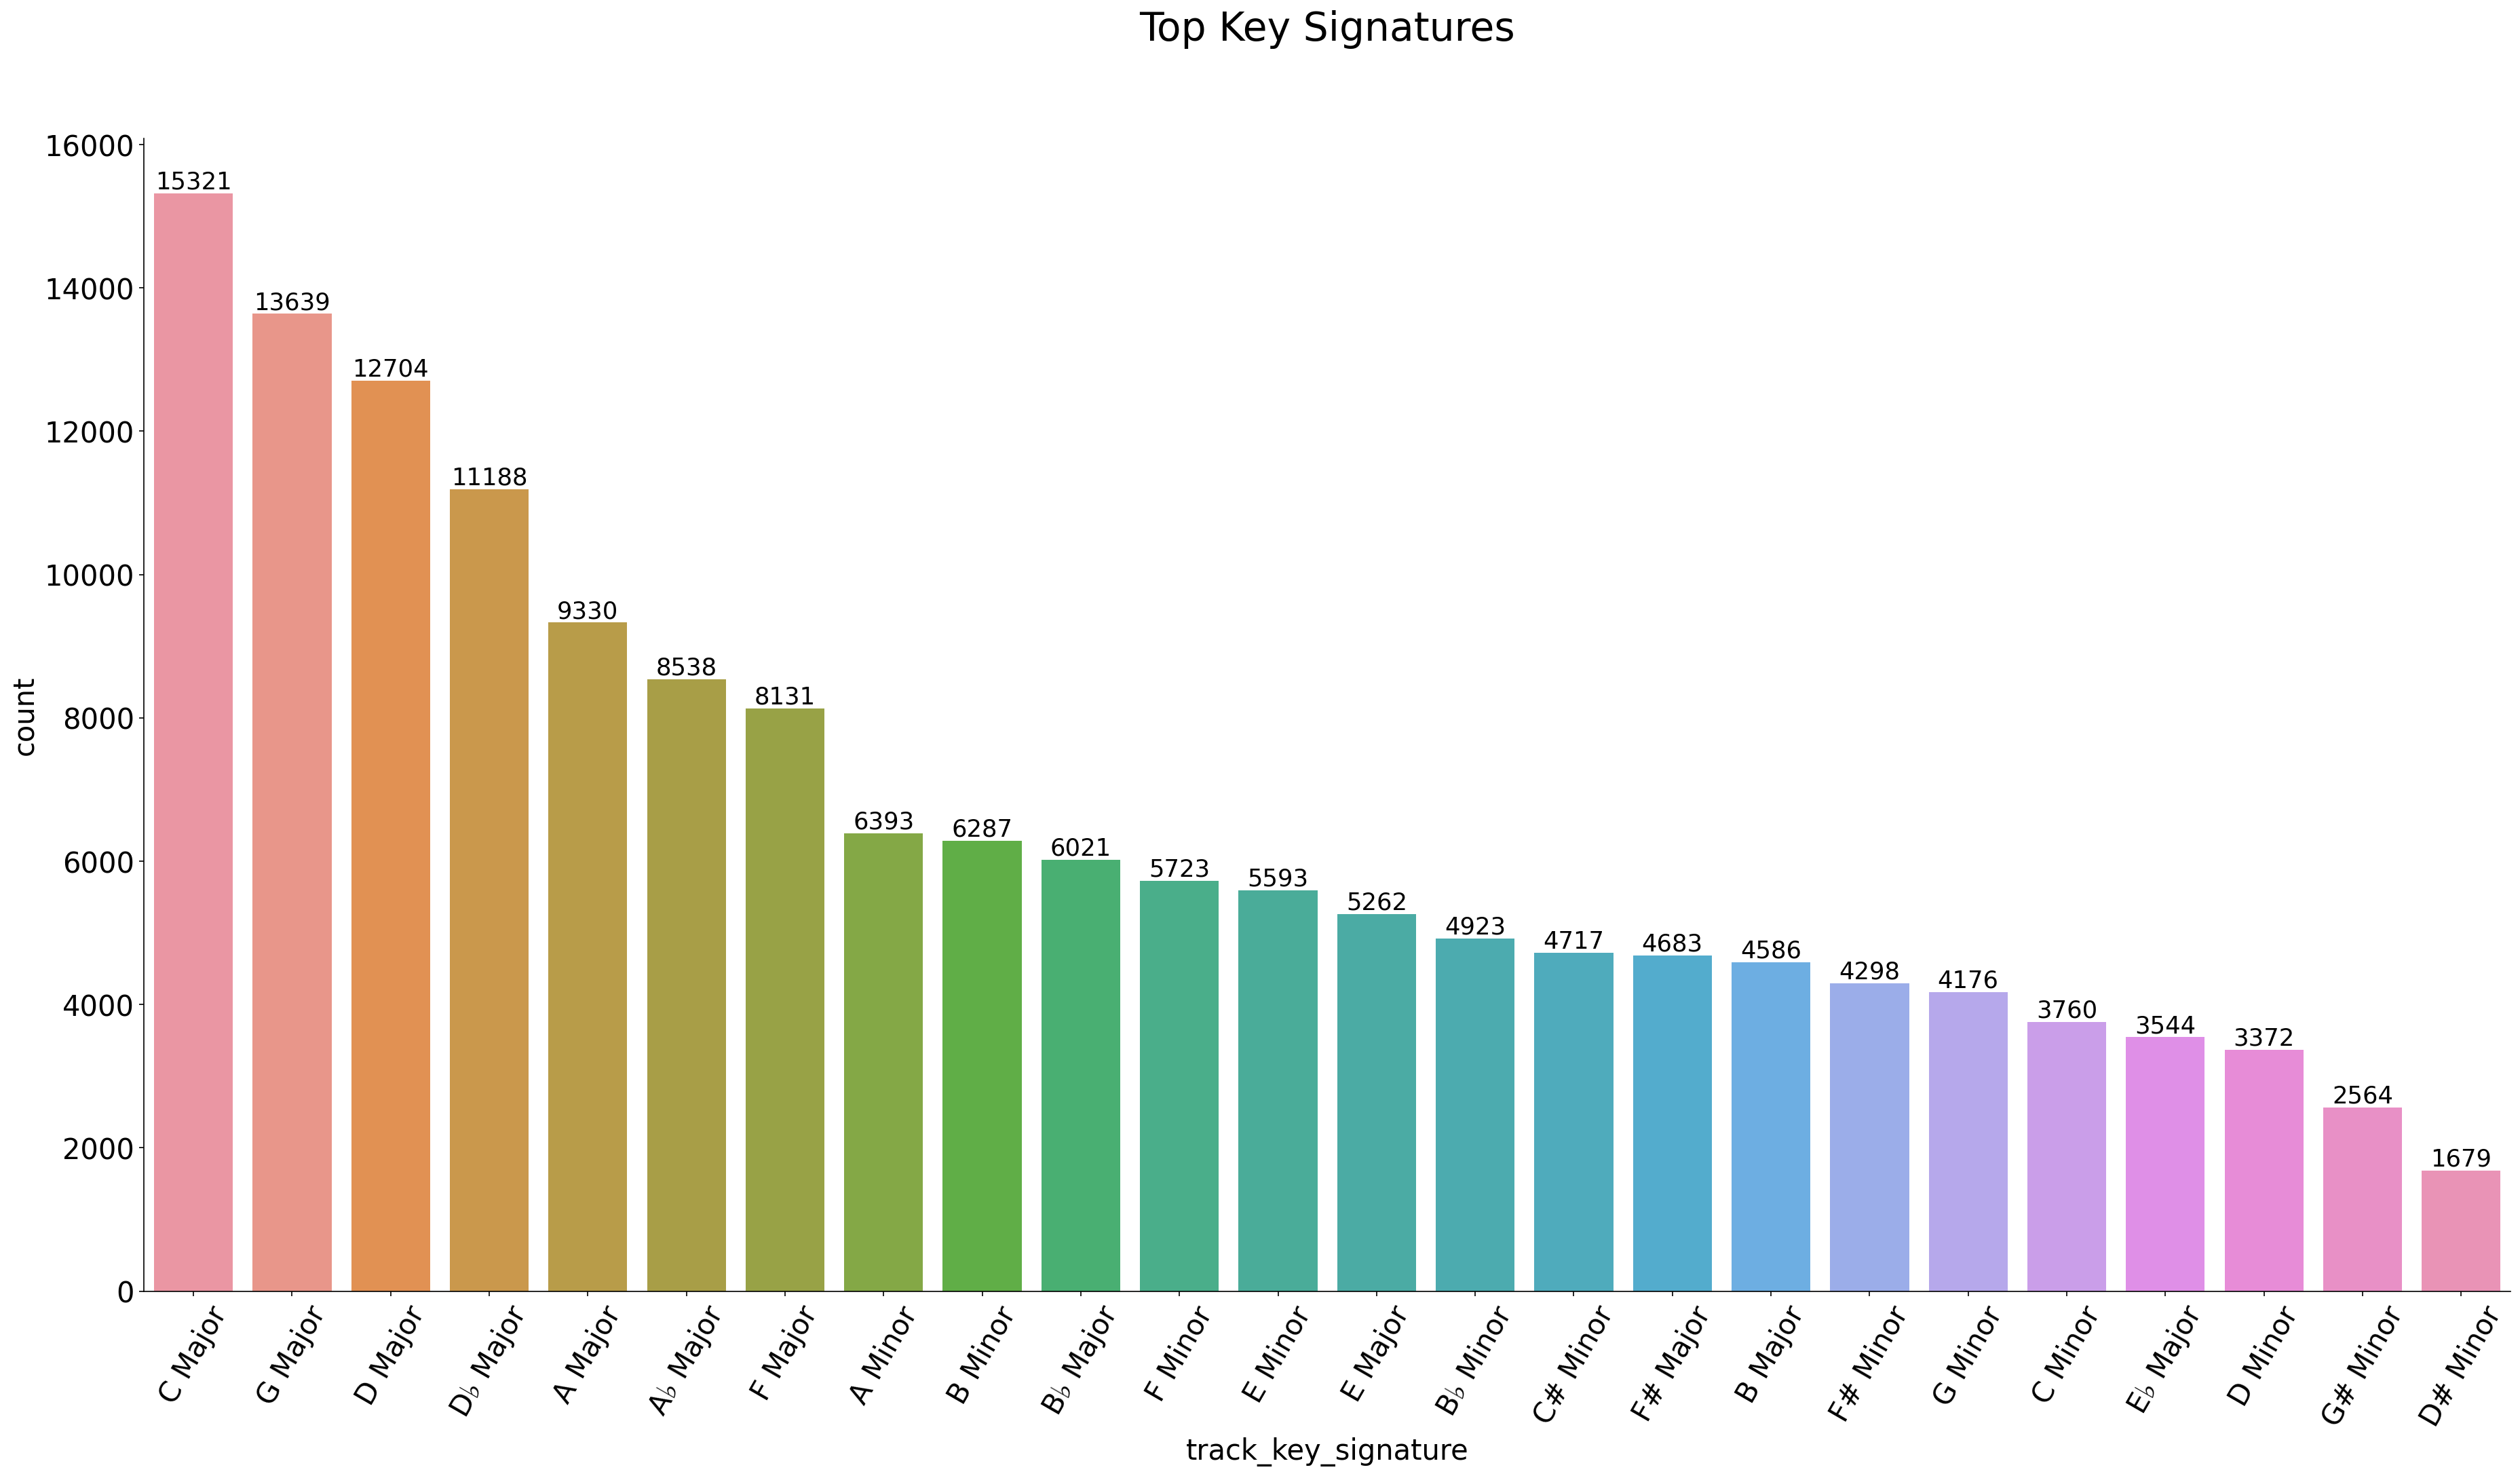

In [196]:
plt.figure(figsize=(30,15), dpi=150)
plt.title('Top Key Signatures\n\n',fontsize=28)
plt.xlabel('Key Signatures', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.track_key_signature,order=pd.value_counts(tracks_df.track_key_signature).iloc[:24].index)
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
seaborn.despine(bottom=False, left=False)
plt.show()

### Album Release Years

It can be seen that there was a significant increase of songs release between 2019 to 2021, and between 2020 and 2021, which is around the time Tiktok began to gain popularity and many artists resorted to it in order to market their songs and gain an audience them which is why there many songs getting released.

In [160]:
album_release_years = tracks_df['album_release_date'].map(lambda x: x[:4])
tracks_df['album_release_year'] = album_release_years

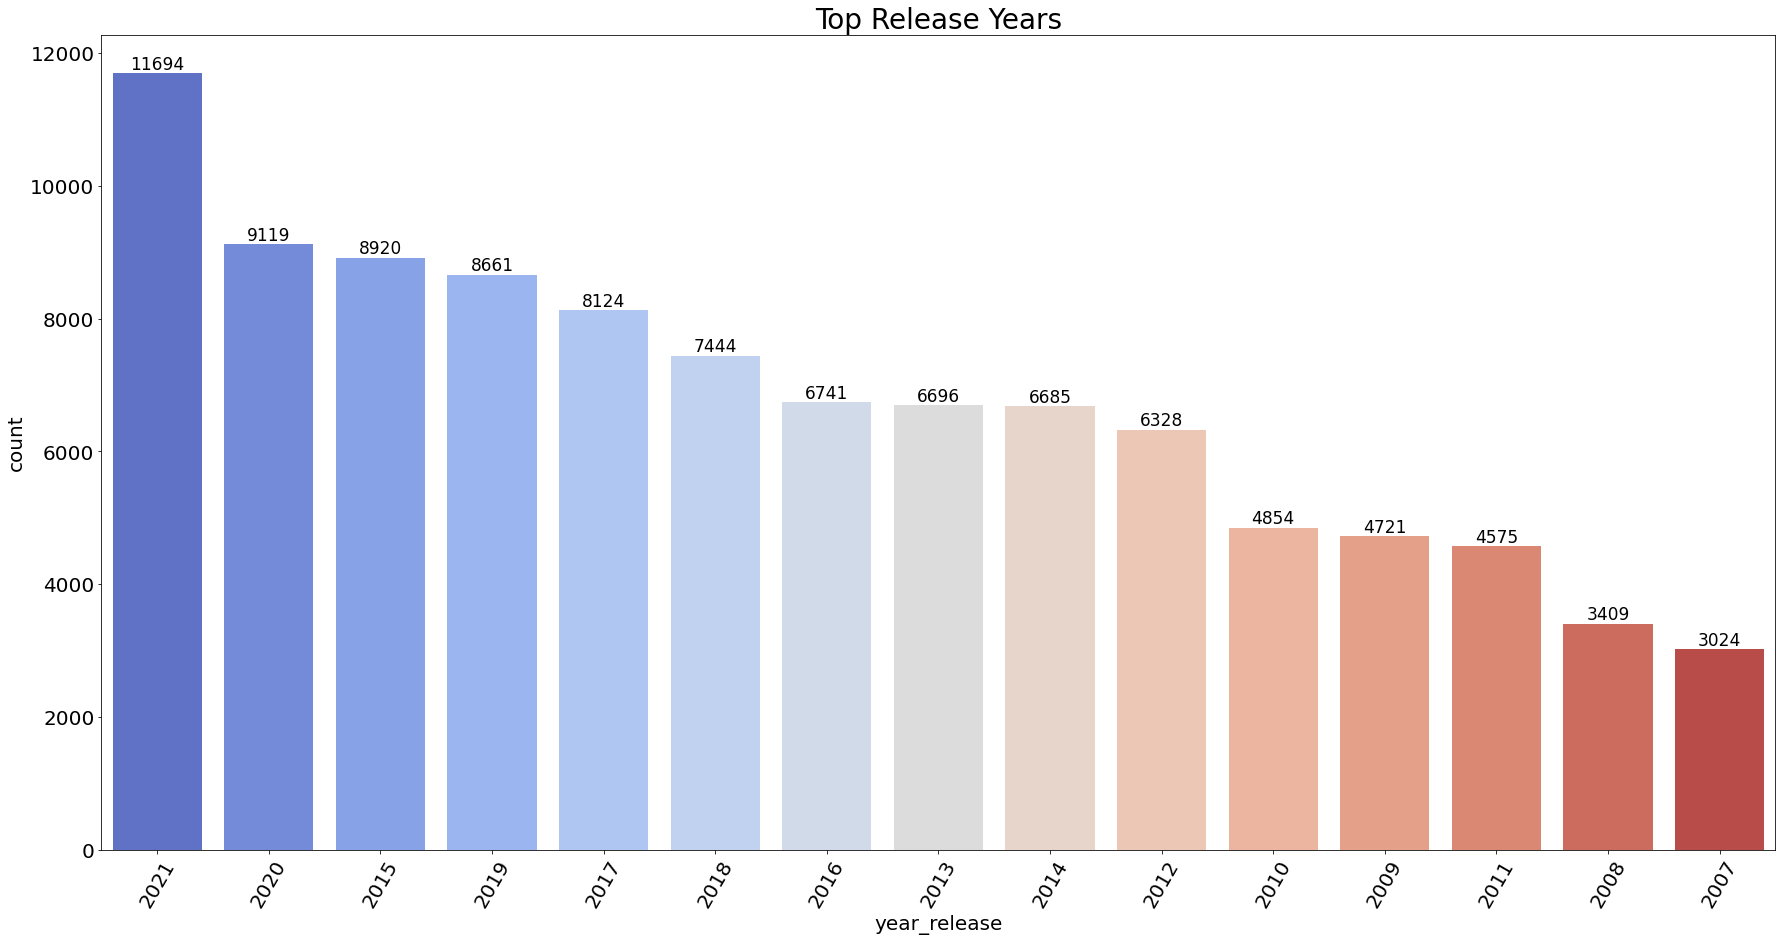

In [39]:
plt.figure(figsize=(30,15))
plt.title('Top Release Years',fontsize=28)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.album_release_year,order=pd.value_counts(tracks_df.album_release_year).iloc[:15].index,palette=seaborn.color_palette("coolwarm", 15))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

In [209]:
import plotly.express as px
y = tracks_df.groupby(['album_release_year']).count()['track_uri'].values
x = tracks_df.groupby(['album_release_year']).count().index
#plt.figure(figsize=(30,15))
#plt.title('Count of the Songs Per Release Year',fontsize=28)
#plt.xlabel('Release Years', fontsize=20)
#plt.ylabel('Number of Songs', fontsize=20)

fig = px.line(x=x, y=y, labels=dict(x="Release Year", y="Number of Songs Released"), title="Number of Songs Released per Year", width=1000, height=600)
fig.update_layout(title_x=0.5)
fig.update_xaxes(tickangle=-70)
fig.show()
#plt.plot(tracks_df.groupby(['album_release_year']).count().index, y)
fig.write_image('line.svg', format='svg')

In [130]:
tracks_audio_features = tracks_df[['track_uri', 'track_name', 'track_artists', 'featured_artists', 'track_is_explicit', 'track_genres', 'track_popularity', 'track_duration_ms', 'track_time_signature', 'track_key_signature', 'track_acousticness', 
'track_danceability', 'track_energy', 'track_instrumentalness', 'track_key', 'track_mode', 'track_liveness', 'track_loudness', 'track_speechiness', 'track_tempo', 'track_valence', 
'track_number', 'album_name', 'album_artist', 'album_release_date', 'album_popularity','album_record_label']]


### Obtaining the Top Songs Using Track Popularity

In [131]:
top_tracks = tracks_audio_features.sort_values('track_popularity', ascending = False).head(500)
top_tracks.head()

,track_uri,track_name,track_artists,featured_artists,track_is_explicit,track_genres,track_popularity,track_duration_ms,track_time_signature,track_key_signature,...,track_loudness,track_speechiness,track_tempo,track_valence,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label
13697,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,Woman,"('Doja Cat',)",NaN,True,"[dance pop, pop]",97,172626,4.0,F Minor,...,-4.175,0.0854,107.998,0.881,1,Planet Her,Doja Cat,2021-06-25,98,Kemosabe Records/RCA Records
21272,spotify:track:0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,"('Lil Nas X',)",NaN,True,"[hip hop, pop]",97,143901,4.0,D♭ Major,...,-7.410,0.2310,76.065,0.207,4,MONTERO,Lil Nas X,2021-09-17,95,Columbia
281,spotify:track:3rmo8F54jFF8OgYsqTxm5d,Bad Habits,"('Ed Sheeran',)",NaN,False,[pop],96,230746,4.0,B Minor,...,-3.745,0.0347,126.011,0.537,4,=,Ed Sheeran,2021-10-29,96,Atlantic Records UK
279,spotify:track:50nfwKoDiSYg8zOCREWAm5,Shivers,"('Ed Sheeran',)",NaN,False,[pop],96,207853,4.0,D Major,...,-2.724,0.0856,141.020,0.822,2,=,Ed Sheeran,2021-10-29,96,Atlantic Records UK
22762,spotify:track:4ZtFanR9U6ndgddUvNcjcG,good 4 u,"('Olivia Rodrigo',)",NaN,True,[pop],96,178146,4.0,F Minor,...,-3.449,0.0608,75.003,0.800,6,SOUR,Olivia Rodrigo,2021-05-21,100,Olivia Rodrigo PS


In [213]:
album_release_years = top_tracks['album_release_date'].map(lambda x: x[:4])
top_tracks['album_release_year'] = album_release_years
#y = top_tracks.groupby(['album_release_year']).count()['track_uri'].values
#plt.figure(figsize=(30,15))
#plt.title('Count of the Top Songs Per Release Year',fontsize=28)
#plt.xlabel('Release Years', fontsize=20)
#plt.ylabel('Number of Songs', fontsize=20)

#plt.plot(top_tracks.groupby(['album_release_year']).count().index, y)

y = top_tracks.groupby(['album_release_year']).count()['track_uri'].values
x = top_tracks.groupby(['album_release_year']).count().index

fig = px.line(x=x, y=y, labels=dict(x="Release Year", y="Number of Hit Songs Released"), title="Number of Hit Songs Released per Year", width=1000, height=600)
fig.update_layout(title_x=0.5)
fig.update_xaxes(tickangle=-70)
fig.show()


In [12]:
describ = tracks_audio_features.describe() # assign describe to variable
null_sum = pd.concat([tracks_audio_features.isnull().sum().rename('NullData'),describ.T],axis=1)
null_sum

,NullData,count,mean,std,min,25%,50%,75%,max
track_uri,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_name,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_artists,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
featured_artists,141661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_is_explicit,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_popularity,0,156480.0,29.935493,19.590452,0.0,14.0000,29.000000,44.00000,97.000
track_duration_ms,0,156480.0,227073.490523,109823.237372,3338.0,177413.0000,214706.000000,259733.00000,4794398.000
track_time_signature,48,156432.0,3.900672,0.448843,0.0,4.0000,4.000000,4.00000,5.000
track_acousticness,48,156432.0,0.318634,0.318640,0.0,0.0375,0.192000,0.57700,0.996
track_danceability,48,156432.0,0.565730,0.179148,0.0,0.4470,0.581000,0.70000,0.980


In [214]:
top_tracks_features = top_tracks[['track_time_signature', 'track_acousticness', 
'track_danceability', 'track_energy', 'track_instrumentalness', 'track_key', 'track_mode', 'track_liveness', 
'track_loudness', 'track_speechiness', 'track_tempo', 'track_valence']]

#### Audio Features Correlation Graph

This graph gives a very interesting insight into the data and how all the integer values for audio features or popularity correlate with one another. The highest correlation that can be

In [215]:
all_tracks_features = tracks_df[['track_time_signature', 'track_acousticness', 
'track_danceability', 'track_energy', 'track_instrumentalness', 'track_key', 'track_mode', 'track_liveness', 
'track_loudness', 'track_speechiness', 'track_tempo', 'track_valence']]

### Comparing the Audio Features for Top Tracks to All Tracks

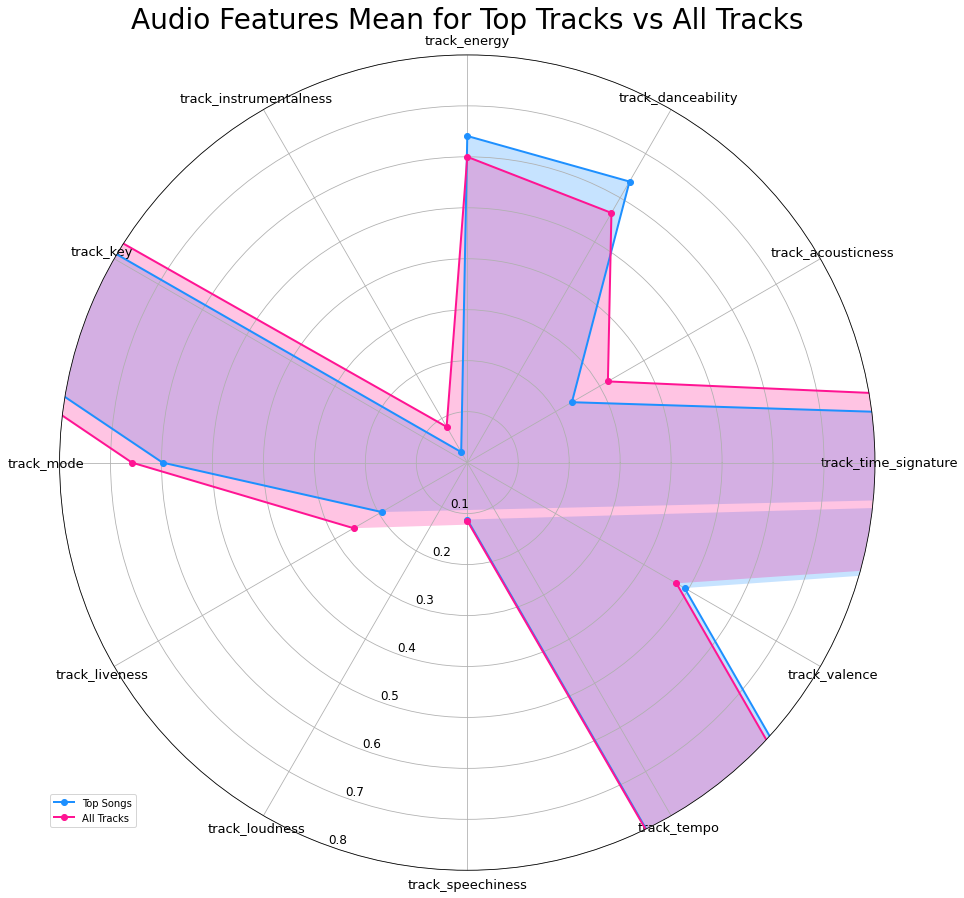

In [216]:
feature_labels = list(top_tracks_features)[:]
top_tracks_features_mean = top_tracks_features.mean().tolist()
all_track_features_mean = all_tracks_features.mean().tolist()

graph_angles = np.linspace(0, 2*np.pi, len(feature_labels), endpoint=False)
fig, ax = plt.subplots(figsize=(20,15), subplot_kw={'projection': 'polar'})
plt.title('Audio Features Mean for Top Tracks vs All Tracks',fontsize=28)

ax.plot(graph_angles, top_tracks_features_mean, 'o-', linewidth=2, label = "Top Songs", color= 'dodgerblue')
ax.fill(graph_angles, top_tracks_features_mean, alpha=0.25, facecolor='dodgerblue')
ax.set_thetagrids(graph_angles * 180/np.pi, feature_labels , fontsize = 13)

ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8, 0.9, 1.0], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', '0.8', '0.9', '1.0'], size=12)
plt.ylim(0,0.8)

ax.plot(graph_angles, all_track_features_mean, 'o-', linewidth=2, label = "All Tracks", color= 'deeppink')
ax.fill(graph_angles, all_track_features_mean, alpha=0.25, facecolor='deeppink')
ax.grid(True)

plt.legend(bbox_to_anchor=(0.1, 0.1))
#orange, dodgerblue, deeppink, g

### Audio Features for Each Time Period

In [165]:
tracks_df['track_time_period'] = tracks_df['album_release_year'].map(lambda x: 'pre-2000s' if int(x)<1990 else 'post-2000s')

Text(0.5, 1.0, 'Danceability in post 2000s and pre 2000s songs')

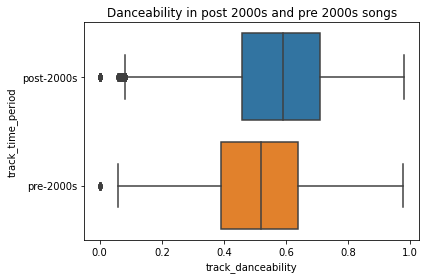

In [166]:
seaborn.boxplot(x="track_danceability", y="track_time_period", data=tracks_df)
plt.title('Danceability in post 2000s and pre 2000s songs')

Text(0.5, 1.0, 'Energy in post 2000s and pre 2000s songs')

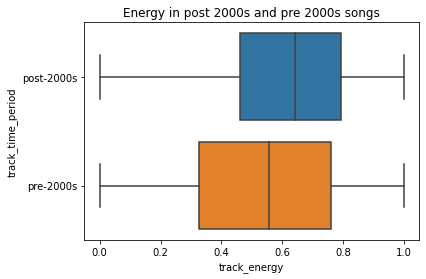

In [167]:
seaborn.boxplot(x="track_energy", y="track_time_period", data=tracks_df)
plt.title('Energy in post 2000s and pre 2000s songs')

Text(0.5, 1.0, 'Valence in post 2000s and pre 2000s songs')

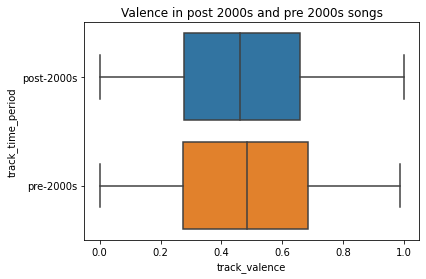

In [168]:
seaborn.boxplot(x="track_valence", y="track_time_period", data=tracks_df)
plt.title('Valence in post 2000s and pre 2000s songs')

Text(0.5, 1.0, 'Acousticness in post and pre 2000 songs')

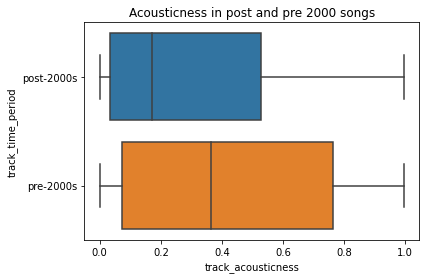

In [170]:
seaborn.boxplot(x="track_acousticness", y="track_time_period", data=tracks_df)
plt.title('Acousticness in post and pre 2000 songs')

Text(0.5, 1.0, 'Speechiness in post and pre 2000 songs')

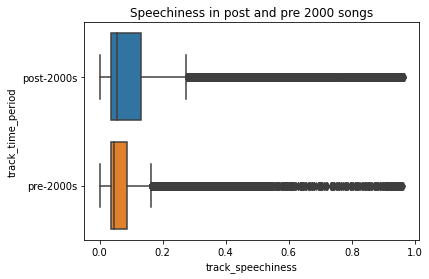

In [172]:
seaborn.boxplot(x="track_speechiness", y="track_time_period", data=tracks_df)
plt.title('Speechiness in post and pre 2000 songs')

Text(0.5, 1.0, 'Liveness in post and pre 2000 songs')

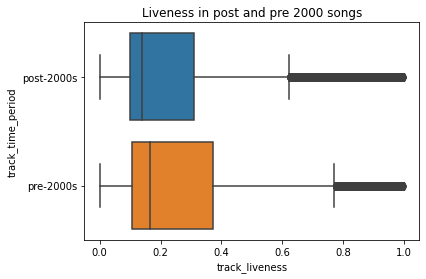

In [173]:
seaborn.boxplot(x="track_liveness", y="track_time_period", data=tracks_df)
plt.title('Liveness in post and pre 2000 songs')

Text(0.5, 1.0, 'Loudness in post and pre 2000 songs')

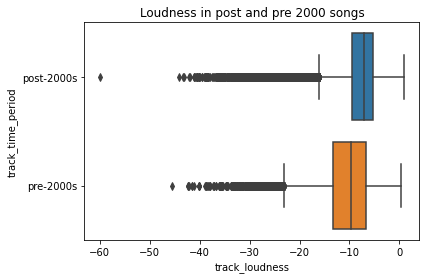

In [174]:
seaborn.boxplot(x="track_loudness", y="track_time_period", data=tracks_df)
plt.title('Loudness in post and pre 2000 songs')

Text(0.5, 1.0, 'Tempo in post and pre 2000 songs')

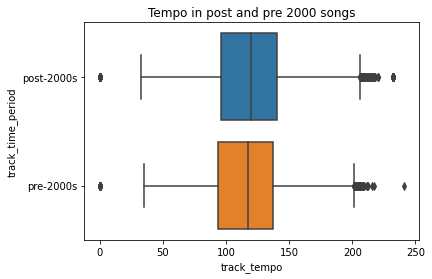

In [175]:
seaborn.boxplot(x="track_tempo", y="track_time_period", data=tracks_df)
plt.title('Tempo in post and pre 2000 songs')

In [184]:
pre_20s = tracks_df.loc[(tracks_df['track_time_period'] == 'pre-2000s')].reset_index()
pre_20s = pre_20s[['track_popularity', 'track_duration_ms', 'track_time_signature', 'track_acousticness', 
'track_danceability', 'track_energy', 'track_instrumentalness', 'track_key', 'track_mode', 'track_liveness', 'track_loudness', 'track_speechiness', 'track_tempo', 'track_valence', 
'album_popularity']]
post_20s = tracks_df.loc[(tracks_df['track_time_period'] == 'post-2000s')].reset_index()
post_20s = post_20s[['track_popularity', 'track_duration_ms', 'track_time_signature', 'track_acousticness', 
'track_danceability', 'track_energy', 'track_instrumentalness', 'track_key', 'track_mode', 'track_liveness', 'track_loudness', 'track_speechiness', 'track_tempo', 'track_valence', 
'album_popularity']]

#### Comparing all Features between Pre 2000s and Post 2000s

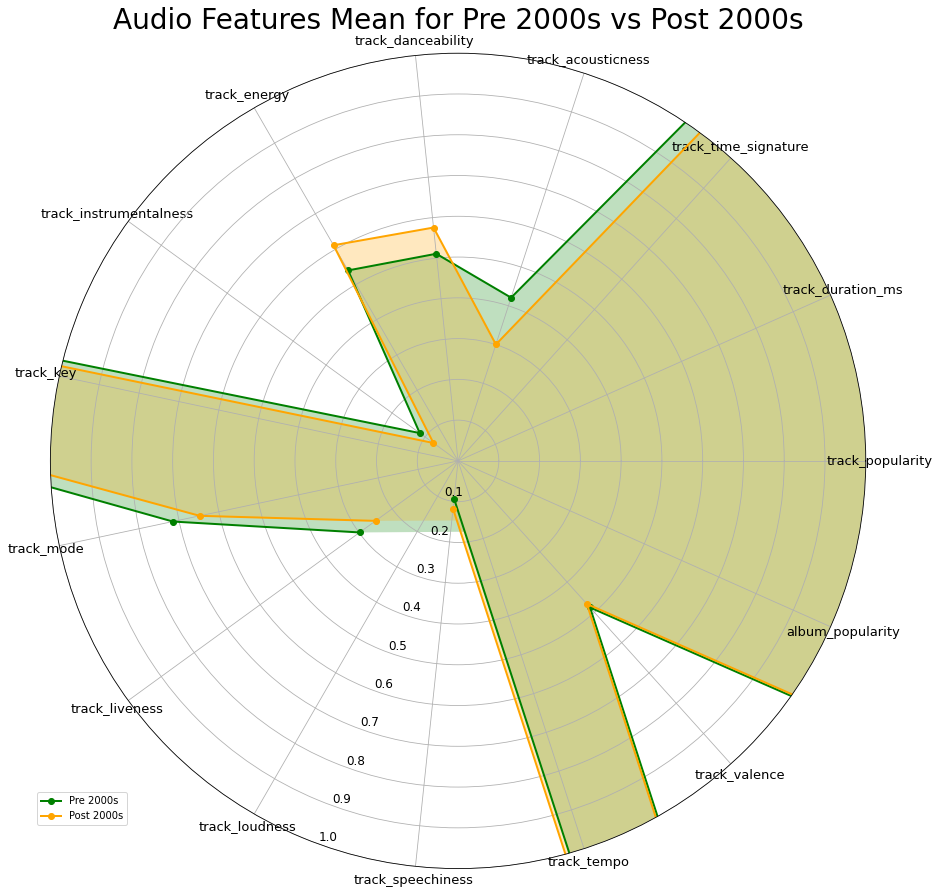

In [188]:
feature_labels = list(pre_20s)[:]
pre_20s_mean = pre_20s.mean().tolist()
post_20s_mean = post_20s.mean().tolist()

graph_angles = np.linspace(0, 2*np.pi, len(feature_labels), endpoint=False)
fig, ax = plt.subplots(figsize=(20,15), subplot_kw={'projection': 'polar'})
plt.title('Audio Features Mean for Pre 2000s vs Post 2000s',fontsize=28)

ax.plot(graph_angles, pre_20s_mean, 'o-', linewidth=2, label = "Pre 2000s", color= 'g')
ax.fill(graph_angles, pre_20s_mean, alpha=0.25, facecolor='g')
ax.set_thetagrids(graph_angles * 180/np.pi, feature_labels , fontsize = 13)

ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8, 0.9, 1.0], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', '0.8', '0.9', '1.0'], size=12)
plt.ylim(0,1)

ax.plot(graph_angles, post_20s_mean, 'o-', linewidth=2, label = "Post 2000s", color= 'orange')
ax.fill(graph_angles, post_20s_mean, alpha=0.25, facecolor='orange')
ax.grid(True)

plt.legend(bbox_to_anchor=(0.1, 0.1))

#### Audio Features Correlation Graph

This graph gives a very interesting insight into the data and how all the integer values for audio features or popularity correlate with one another. The highest correlation that can be clearly seen is etween track popularity and album popularity which is sensible since popular albums will contain more popular tracks. The next highest correlation is between the track's energy and loudness meaning that most tracks that reflect a lot of energy are considered loud musically. Next we can see a positive correlation between valence and dancability which isn't as high bbut still crosses the half way point. Valence is how musically positive a piece sounds hence it couldd mean that sounds that sound more musically positive are danceworthy. There is also a correlation between the dancebility and the loudness of a sound since a lot of dance songs can be loud. 

Now for the negatively correlated features, the highest which is the energy of the song and the acousticeness of the sound. Since acoustic versions of songs are generally slow and stripped down musically. The music does not convey energy. The next feature also negatively correlated to acousticeness is the loudness of a song. Again since, the tracks are usually stripped back in acoustic versions it is likely that they less loud. Loudness is also negatively correlated with instrumentalness since instrumental music isnt usually loud. Lastly, the danceability of a song is less likely for instumental versions.  

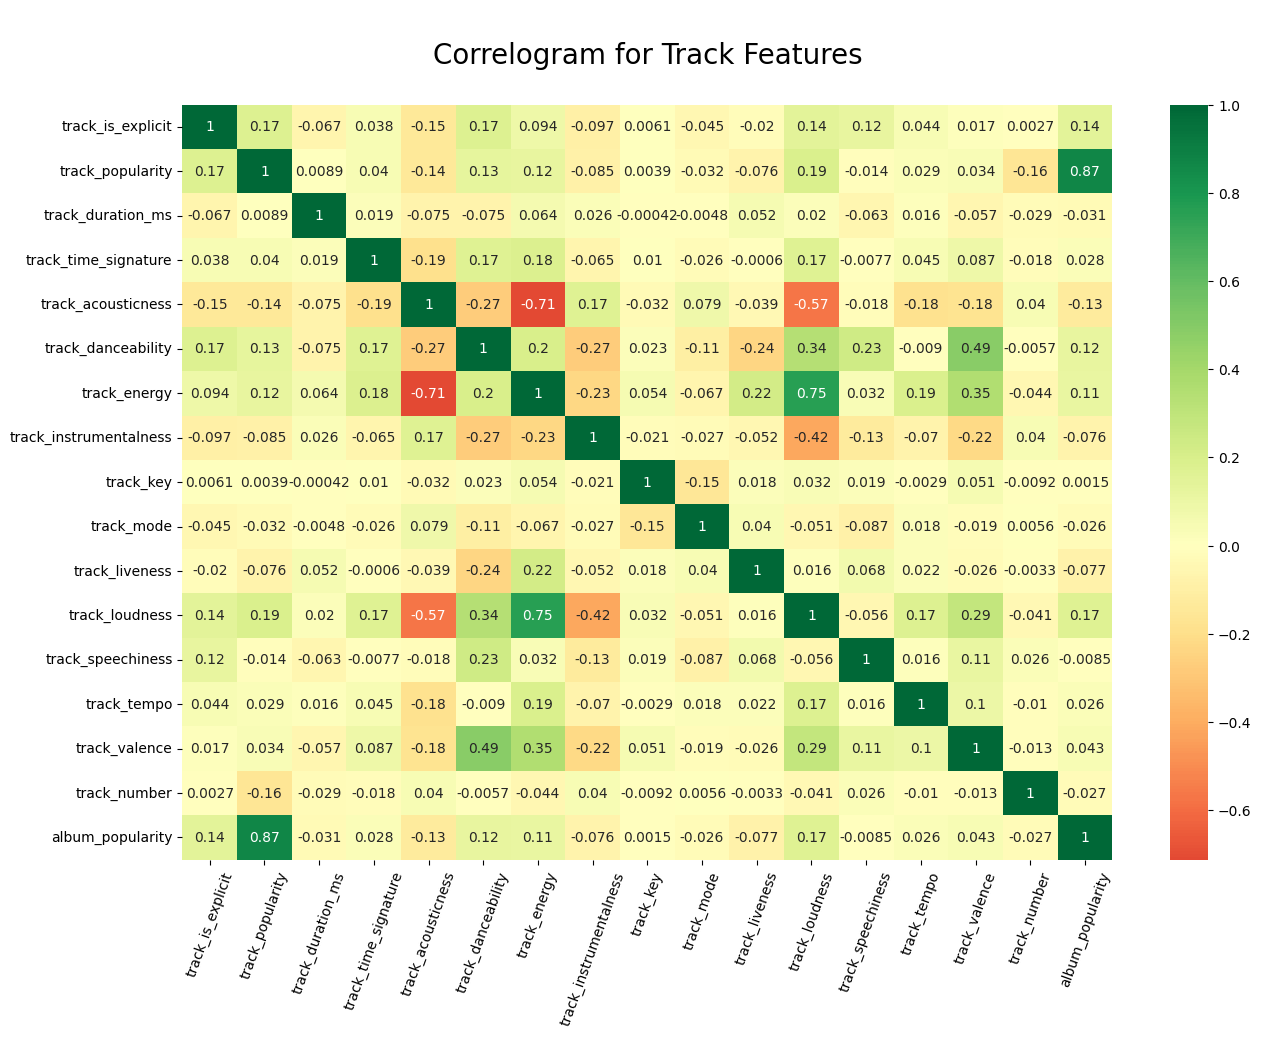

In [189]:
plt.figure(figsize=(15,10), dpi= 100)
seaborn.heatmap(tracks_audio_features.corr(), xticklabels=tracks_audio_features.corr().columns, yticklabels=tracks_audio_features.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('\nCorrelogram for Track Features\n', fontsize=20)
plt.xticks(fontsize=10,rotation=70)
plt.yticks(fontsize=10)
plt.show()

### Duration Analysis

In [ ]:
def time_in_minutes(duration):
    seconds = duration/1000
    minutes = seconds/60
    return minutes

tracks_audio_features['track_duration_minutes'] = tracks_audio_features['track_duration_ms'].map(time_in_minutes)
tracks_audio_features.head()